##### import os
os.environ['PYTHONHASHSEED'] = '0'
os.environ["CUDA_VISIBLE_DEVICES"]=""

In [183]:
import numpy as np
my_seed =3 
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf

tf.random.set_seed(my_seed)

In [184]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
from keras.layers import *
from keras.models import *
#导入时间库计时
import time
import warnings
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
#设置字体为SimHei显示中文  #设置正常显示字符
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")


In [185]:
plt.rc('font', family='Times New Roman')
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=17, color='grey')
plt.rc('ytick', labelsize=17, color='grey')
plt.rc('legend', fontsize=15, loc='lower left')
plt.rc('figure', titlesize=12)
plt.rc('savefig', dpi=500, bbox='tight')
%matplotlib inline

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [186]:
df = pd.read_csv(r"E:\桌面\活\活2（python）\特征选择-csv文件\continuous dataset.csv",index_col=0)

In [187]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


In [188]:
df.index = pd.to_datetime(df.index)

In [189]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1


Text(0.5, 1.0, '')

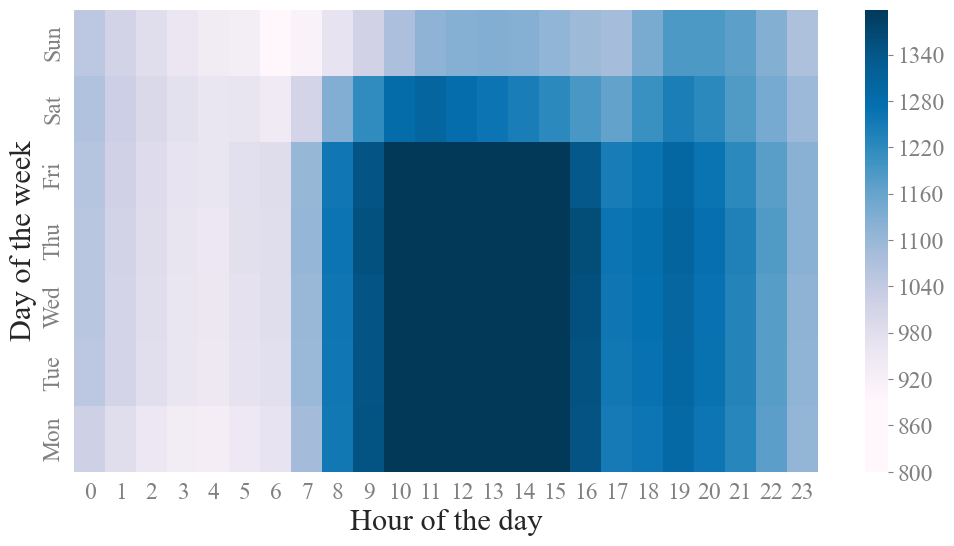

In [190]:
from calendar import day_abbr, month_abbr, mdays
a = day_abbr[0:7]
a.reverse()
data_dict = {0: [df, '',800, 1400, 2]}
plt.rc('savefig', dpi=500, bbox='tight')
fig, ax = plt.subplots(figsize=(12,6))
data = data_dict[0][0]
file_name = data_dict[0][1]
hour_week = pd.DataFrame({'nat_demand':data.loc[:,'nat_demand']})
hour_week['day_of_week'] = hour_week.index.dayofweek
hour_week['hour'] = hour_week.index.hour
hour_week = hour_week.groupby(['day_of_week','hour']).mean().unstack()
hour_week  = hour_week.iloc[::-1]# 行反序
hour_week.columns = hour_week.columns.droplevel(0)

sns.heatmap(hour_week, ax = ax, cmap=plt.cm.PuBu, vmax=data_dict[0][3],
            cbar_kws={'boundaries':np.arange(data_dict[0][2],data_dict[0][3],data_dict[0][4])})

cbax = fig.axes[0]
# cbax.set_ylabel('Electricity Power GW')
# cbax.set_xlabel('Hour of the day')
ax.set_xlabel('\n')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Day of the week')
ax.set_yticklabels(a)
ax.set_title(data_dict[0][1])
# plt.savefig(r'C:\Users\Administrator\Desktop\活\接活论文\特征选择\每小时与每日负荷热力图')

In [191]:
df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [192]:
df["time"] =df.index
df['hour of the day'] = [x.hour for x in df['time']]
df['month of the year'] = [x.month for x in df['time']]
df["day of the week"] =df["time"].apply(lambda x: x.isocalendar()[2])
df['working day'] = df['day of the week'].apply(lambda x: 0 if x>5 else 1)

In [193]:
df = df.drop(columns="time")

In [194]:
df

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school,hour of the day,month of the year,day of the week,working day
datetime,,,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0,1,1,6,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0,2,1,6,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0,3,1,6,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0,4,1,6,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0,5,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26 20:00:00,1128.5592,27.246545,0.020303,0.055511,9.289304,25.715295,0.019746,0.121552,1.990773,23.746545,0.018381,0.150879,2.444658,0,0,1,20,6,5,1
2020-06-26 21:00:00,1112.7488,27.099573,0.020395,0.053848,9.837504,25.552698,0.019632,0.153870,2.094459,23.693323,0.018320,0.156311,2.515814,0,0,1,21,6,5,1
2020-06-26 22:00:00,1081.5680,26.971155,0.020448,0.057251,10.262464,25.393030,0.019518,0.144531,2.396369,23.658655,0.018327,0.153259,2.800717,0,0,1,22,6,5,1


In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
# 使用随机森林对特征进行排序
MO_labels = df.columns[1:] #取出特征名


# 开始搭建随机森林代码
forest=RandomForestRegressor(max_depth=12,n_estimators=113,random_state=0,n_jobs=-1)
#切分训练集测试集
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:].values,df["nat_demand"],test_size=0.3,shuffle=True,random_state=12)
forest.fit(X_train, y_train)
#特征重要性函数
importances = forest.feature_importances_
# 对随机森林特征重要性结果排序
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,MO_labels[indices[f]], importances[indices[f]]))

 1) hour of the day                0.732354
 2) working day                    0.072493
 3) day of the week                0.067668
 4) Holiday_ID                     0.024834
 5) holiday                        0.022042
 6) TQL_toc                        0.012247
 7) T2M_toc                        0.011206
 8) T2M_dav                        0.007936
 9) QV2M_toc                       0.006358
10) QV2M_san                       0.005927
11) W2M_toc                        0.005716
12) month of the year              0.004831
13) TQL_san                        0.004689
14) TQL_dav                        0.004466
15) QV2M_dav                       0.004415
16) T2M_san                        0.004364
17) W2M_san                        0.004049
18) W2M_dav                        0.004034
19) school                         0.000372


,importance,var
8,0.379580,T2M_dav
15,0.266861,hour of the day
17,0.121009,day of the week
18,0.069189,working day
13,0.052363,holiday
12,0.042272,Holiday_ID
0,0.018256,T2M_toc
16,0.008775,month of the year
2,0.007206,TQL_toc
4,0.004419,T2M_san


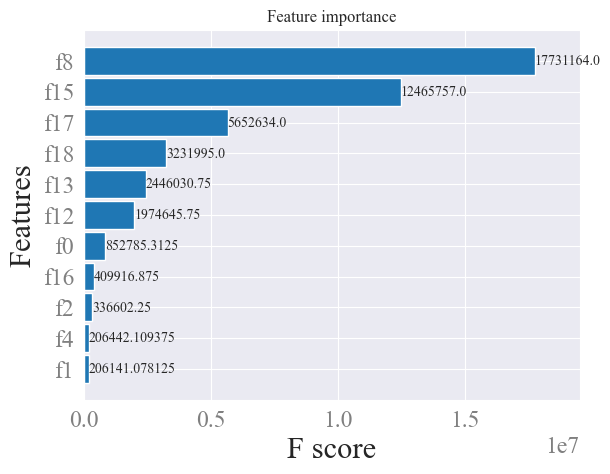

In [196]:
import xgboost as xgb
# 使用xgboost筛选特征
model = xgb.XGBRegressor(max_depth=4,
                        learning_rate=0.1,#0.35
                        n_estimators=100,
                        objective='reg:linear', # 此默认参数与 XGBClassifier 不同
                        booster='gbtree',
                        gamma=0,
                        min_child_weight=0.01,
                        subsample=1,
                        colsample_bytree=0.8,
                        reg_alpha=0,
                        reg_lambda=1,)
model.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_test, y_test)],
          verbose=False)
xgb.plot_importance(model,max_num_features=11,importance_type='gain', height=0.9)
im=pd.DataFrame({'importance':model.feature_importances_,'var':df.columns[1:]})
im=im.sort_values(by='importance',ascending=False)
im.head(10)

<BarContainer object of 19 artists>

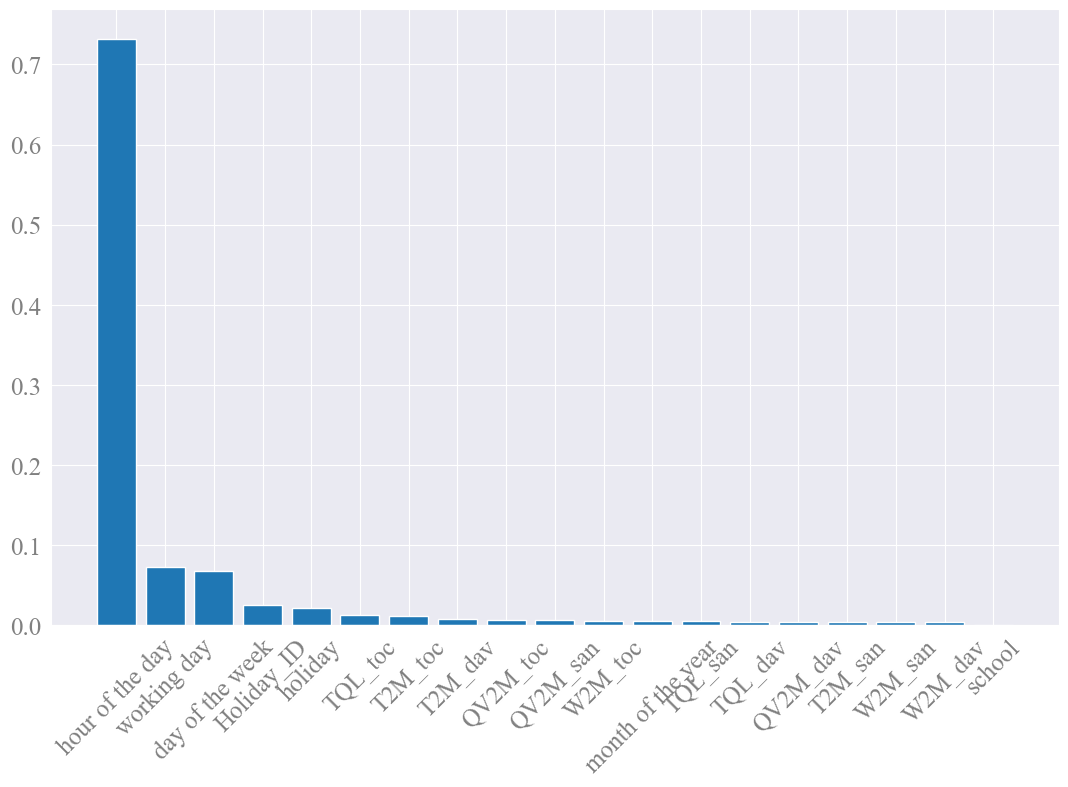

In [197]:
im = im.set_index(im.iloc[:,1],inplace=False,drop=False)
im =im.iloc[:,0]
t = pd.DataFrame()
for f in range(X_train.shape[1]):
    t.loc[f,0] = MO_labels[indices[f]]
    t.loc[f,1] =importances[indices[f]]
from matplotlib.dates import AutoDateLocator, DateFormatter  
#设置字体为SimHei显示中文  #设置正常显示字符
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size' : 32,
}

plt.figure(figsize = [13, 8])
plt.xticks(rotation=45)
plt.tick_params(labelsize=18)
plt.bar(t.loc[:,0],t.loc[:,1])



In [198]:
t = t.set_index(t.iloc[:,0],inplace=False,drop=False)
t = t.iloc[:,1].rename("importance")
feature = t+im
d = feature.sort_values(ascending = False)
dd =im.sort_values(ascending = False)
ddd=t.sort_values(ascending = False)

In [199]:
d


hour of the day      0.999215
T2M_dav              0.387516
day of the week      0.188677
working day          0.141682
holiday              0.074405
Holiday_ID           0.067106
T2M_toc              0.029462
TQL_toc              0.019453
month of the year    0.013606
QV2M_toc             0.010771
W2M_toc              0.010051
QV2M_san             0.009119
T2M_san              0.008783
TQL_san              0.008079
QV2M_dav             0.007755
W2M_san              0.007496
TQL_dav              0.007152
W2M_dav              0.007120
school               0.002551
Name: importance, dtype: float64

In [200]:
df.keys()

Index(['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
       'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav', 'QV2M_dav', 'TQL_dav',
       'W2M_dav', 'Holiday_ID', 'holiday', 'school', 'hour of the day',
       'month of the year', 'day of the week', 'working day'],
      dtype='object')

In [201]:
df =df[['nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc', 'T2M_san',
         'T2M_dav', 
        'Holiday_ID', 'holiday', 'hour of the day',
       'month of the year', 'day of the week', 'working day']]

In [202]:
df.to_csv(r"E:\桌面\活\活2（python）\特征选择-csv文件\筛选后的负荷与其它特征.csv",sep=',',index=True,header=True,encoding='utf-8-sig')

In [203]:
d.to_csv(r"E:\桌面\活\活2（python）\特征选择-csv文件\特征重要性.csv",sep=',',index=True,header=True,encoding='utf-8-sig')